# Data Dictionary: 
1. Sex: "Male", "Female"
2. Age: Rounded upto 5 years
3. Height: Rounded upto 5 cms
4. Weight: Kgs
5. Wasitline: The measurement of the waist
5. sight_left: Left eye sight
6. sight_right: Right eye sight
7. hear_left: Left ear hearing level - 1: `Normal`, 2: `Abnormal`
8. hear_right: Right hearing level - 1: `Normal`, 2: `Abnormal`
9. SBP: Systolic blood pressure - Ventricle contraction
10. DBP: Diastolic blood pressure - Pressure between ventricle to ventricle contraction
11. BLDS: Fasting blood glucose level
12. tot_chole: total cholestrol
13. HDL_chole: HDL cholestrol - High Desnity Level cholestrol (Good cholestrol) absorps the cholestrol in the blood and carries it to liver to flush it out from the body. 
14. LDL_chole: LDL cholestrol - Low Density Level cholestrol (Bad cholestrol) - It is the total cholestrol in the blood which isn't flushed out of the body. It can raise the risk of heart attack.
15. Triglyceride: The calories which are not used right away are stored as triglyceride and can be used when energy is required between meals.
16. hemoglobin: Hemoglobin is a protein in red blood cells that carries oxygen.
17. urine_protein: The amount of protein in the urine, which indicated the health of the kidneys.
18. serum_creatinine: Blood test used to measure how well the kidneys are filtering your blood. 
19. SGOT_AST: Aspartate aminotransferase (AST) test measures the level of AST and helps determine the liver health. 
20. SGOT_ALT: Alanine transferase is conducted to check the liver health, since AST is not directly related to liver disease. Health specialists conduct both AST and ALT test to conduct the liver damage. 
21. Gamma_GTP: gamma-glutamyl transpeptidase or gamma-glutamyl transferase. This test basically tells you if the liver is functioning properly or not. 
22. SMK_stat_type_cd: 1: Never Smoke, 2: Used to smoke but quit, 3: Still smokes
23. DRK_YN: 0: Not Drinker, 1: Drinker

# Library Imports

In [236]:
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Reading Data

In [237]:
df = pd.read_csv("/Users/vishal/Desktop/Way to New World/University/01_All_Semesters/02_Semester/02_Machine Learning P/Final Term Project /Alcohol-Classification/Datasets/smoking_driking_dataset_Ver01.csv")

# Checking Info & Description

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

#### Column Categorization: 
`Numerical Columns`: 21
`Categorical`: 2

In [239]:
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


#### According to the `mean` and `median` of all the columns. There is no major skewness in the data. 

# Checking for Null Values

In [240]:
df.isnull().sum()/len(df) * 100

sex                 0.0
age                 0.0
height              0.0
weight              0.0
waistline           0.0
sight_left          0.0
sight_right         0.0
hear_left           0.0
hear_right          0.0
SBP                 0.0
DBP                 0.0
BLDS                0.0
tot_chole           0.0
HDL_chole           0.0
LDL_chole           0.0
triglyceride        0.0
hemoglobin          0.0
urine_protein       0.0
serum_creatinine    0.0
SGOT_AST            0.0
SGOT_ALT            0.0
gamma_GTP           0.0
SMK_stat_type_cd    0.0
DRK_YN              0.0
dtype: float64

# Removing Duplicate Values

In [241]:
df_ = df.drop_duplicates()
print(f"Dropped Duplicates: {len(df) - len(df_)}")

Dropped Duplicates: 26


### Observation: 
- There are 26 duplicates in the dataframe, dropping them before analysis/model building will help us assess the data more. However, 26 duplicates is not a huge number of observations. It might not affect the analysis or model building.

# Checking Min and Max values to assess outliers

In [242]:
for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
        print("--------------------------------------------------")
        print(f"\t{cols}")
        print(f"Max Value: {df[cols].max()}")
        print(f"Min Value: {df[cols].min()}")
        print("--------------------------------------------------")

--------------------------------------------------
	age
Max Value: 85
Min Value: 20
--------------------------------------------------
--------------------------------------------------
	height
Max Value: 190
Min Value: 130
--------------------------------------------------
--------------------------------------------------
	weight
Max Value: 140
Min Value: 25
--------------------------------------------------
--------------------------------------------------
	waistline
Max Value: 999.0
Min Value: 8.0
--------------------------------------------------
--------------------------------------------------
	sight_left
Max Value: 9.9
Min Value: 0.1
--------------------------------------------------
--------------------------------------------------
	sight_right
Max Value: 9.9
Min Value: 0.1
--------------------------------------------------
--------------------------------------------------
	hear_left
Max Value: 2.0
Min Value: 1.0
--------------------------------------------------
---------

### Reviewing the Columns for Abnormalities
- Waistline: The maximum value is 999.0, which is quite abnormal and likely to be a data entry error or outlier, as typical human waist measurements are much smaller.
- Sight (left and right): The values range from 0.1 to 9.9, which could be valid depending on the scale used to measure sight. However, it's worth confirming if the scale used is typical and whether these values make sense in that context.
- HDL_cholesterol and LDL_cholesterol:
- HDL_chole: The maximum value is 8110, which is extraordinarily high and likely an error since normal HDL cholesterol levels are generally below 100 mg/dL.
- LDL_chole: The maximum value is 5119, also highly abnormal as typical LDL cholesterol levels are generally below 190 mg/dL for very high risk individuals.
- Triglyceride: A max value of 9490 mg/dL is very high and likely incorrect. Normal triglyceride levels are below 150 mg/dL, with levels above 500 mg/dL considered very high.
- Hemoglobin: A maximum value of 25.0 g/dL is on the higher end but might still be plausible. Typically, normal ranges are from about 13.8 to 17.2 g/dL for men and 12.1 to 15.1 g/dL for women.
- Serum Creatinine: The maximum value of 98.0 mg/dL is extremely high. Normal ranges are typically 0.6 to 1.2 mg/dL for males and 0.5 to 1.1 mg/dL for females, indicating possible data entry errors or severe medical conditions.
- SGOT_AST and SGOT_ALT:
- SGOT_AST: A maximum value of 9999.0 IU/L is abnormally high since normal ranges are about 10 to 40 IU/L.
- SGOT_ALT: Similarly, a max of 7210.0 IU/L is extremely high compared to the normal range of 7 to 56 IU/L.
- Gamma_GTP: A max of 999 IU/L is very high; typically, levels would be less than 60 IU/L for men and less than 40 IU/L for women.


In [243]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

# Reviewing Scale of Eye Sight

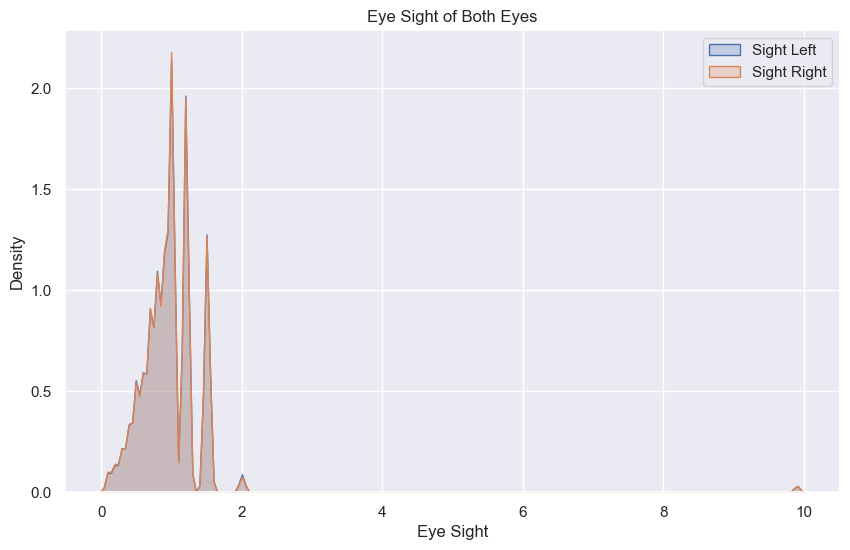

In [244]:
plt.figure(figsize=(10,6))
sns.kdeplot(df, x="sight_left", shade=True, label="Sight Left")
sns.kdeplot(df, x="sight_right", shade=True, label="Sight Right")
plt.xlabel("Eye Sight")
plt.ylabel("Density")
plt.title("Eye Sight of Both Eyes")
plt.legend(loc="upper right")
plt.show()

### Observation: 
- Eye sight of both the eyes are getting overlapped on each other. Both the columns are precisely equal. 
- Upon close observation, there is a slight bump near 9.9, which indicated blindness.
### Action: 
- It would be a best practice to feature engineer the 9.9 scaled values to another column called `blindness`.

# Feature Engineering

In [245]:
df_["blindness"] = ((df['sight_left'] == 9.9) & (df['sight_right'] == 9.9)).astype(int)
df_ = df_[(df_["sight_left"] < 9.9) & (df_["sight_right"] < 9.9)]
df_.head()

/var/folders/by/j9csnfcn3c30bpt40jz1c2qw0000gn/T/ipykernel_1510/2799683263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_["blindness"] = ((df['sight_left'] == 9.9) & (df['sight_right'] == 9.9)).astype(int)


,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,blindness
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y,0
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N,0
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N,0
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N,0
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N,0


# Outlier Analysis

### Reason for outlier removal
- Since there are many abnormalities in the data, removing outlier first before analysis would help us assess more insights.

In [246]:
Categorical_features = [cols for cols in df_.columns if (df_[cols].dtype == 'object') or (len(df_[cols].unique())<7)]
Numerical_features = [cols for cols in df_.columns if (df_[cols].dtype in ['int64', 'float64']) and (len(df_[cols].unique()) > 7)]
Numerical_features

['age',
 'height',
 'weight',
 'waistline',
 'sight_left',
 'sight_right',
 'SBP',
 'DBP',
 'BLDS',
 'tot_chole',
 'HDL_chole',
 'LDL_chole',
 'triglyceride',
 'hemoglobin',
 'serum_creatinine',
 'SGOT_AST',
 'SGOT_ALT',
 'gamma_GTP']

# Removing outliers

In [247]:
columns_to_check = ['waistline', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']

In [248]:

z_scores = (
    df_[columns_to_check] - df_[columns_to_check].mean()
) / df_[columns_to_check].std()

# 3σ Standart deviation
threshold = 3
outliers = np.abs(z_scores) > threshold
outlier_columns = outliers.columns[outliers.any()]
df_cleaned = df_[~outliers.any(axis=1)]

### Note: 
The reason to not consider the `age`, `weight`, `height`, `sight_left`, and `sight_right` is due to their distribution. They are anomolies not outliers. 

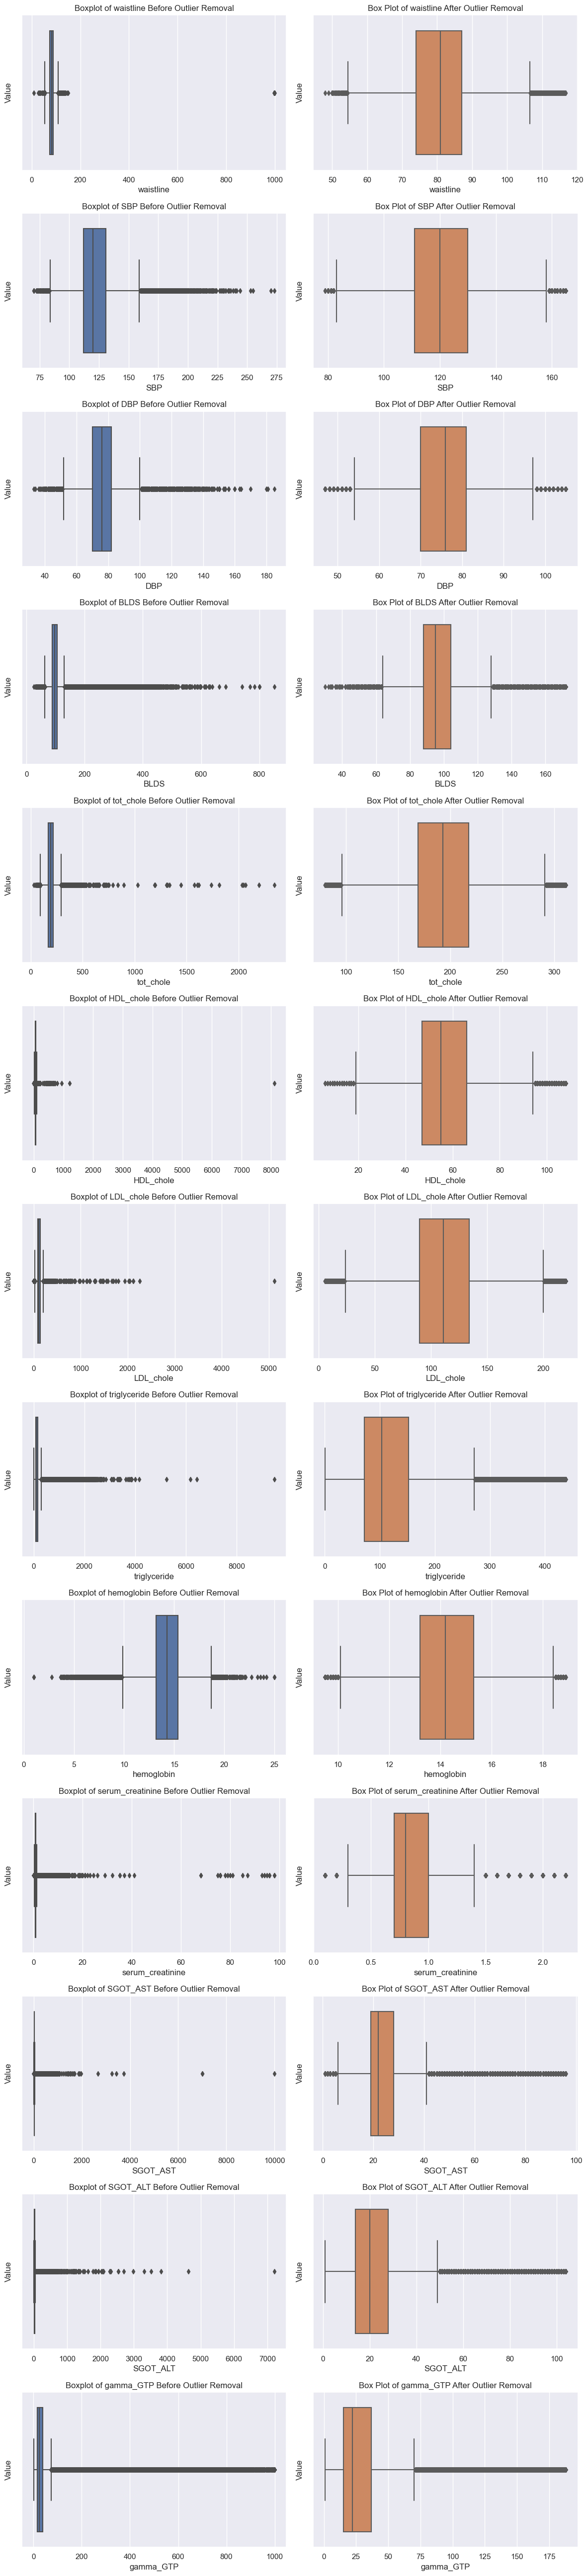

In [249]:
num_rows = len(columns_to_check)
num_cols = 2  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12
                                                      , 4 * num_rows))
sns.set(style="whitegrid")

if num_rows == 1:
    axes = np.expand_dims(axes, 0)

for i, column in enumerate(columns_to_check):
  
    sns.boxplot(data=df_, x=column, ax=axes[i, 0])
    axes[i, 0].set_title('Boxplot of {} Before Outlier Removal'.format(column))
    axes[i, 0].set_ylabel('Value')

    sns.boxplot(
        data=df_cleaned,
        x=column,
        ax=axes[i, 1],
        color=sns.color_palette()[1]
    )
    axes[i, 1].set_title('Box Plot of {} After Outlier Removal'.format(column))
    axes[i, 1].set_ylabel('Value')

plt.tight_layout()
plt.show()

# Exploratory Data Analysis

# Target Distribution

Text(0.5, 1.0, 'Distribution of Target Class')

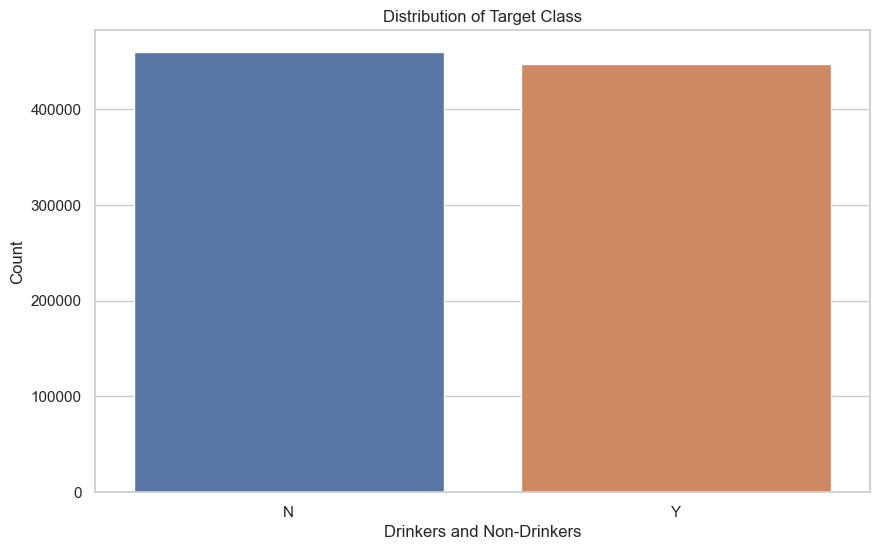

In [250]:
plt.figure(figsize=(10,6))
target_distribution = df_cleaned.groupby('DRK_YN').size().reset_index(name='count')
sns.barplot(data=df_cleaned, x=target_distribution['DRK_YN'], y=target_distribution['count'])
plt.xlabel('Drinkers and Non-Drinkers')
plt.ylabel('Count')
plt.title('Distribution of Target Class')

### Observation: 
- The target class - Drinkers and Non-Drinkers are equally distributed. So there is no need to perform sampling methods to balance the data.

# Checking the distribution of Drinkers and Non Drinkers with respect to Gender

In [251]:
gend_alcohol = df_cleaned.groupby(['DRK_YN', 'sex']).size().reset_index(name='count')
gend_alcohol

,DRK_YN,sex,count
0,N,Female,302439
1,N,Male,156971
2,Y,Female,133160
3,Y,Male,314106


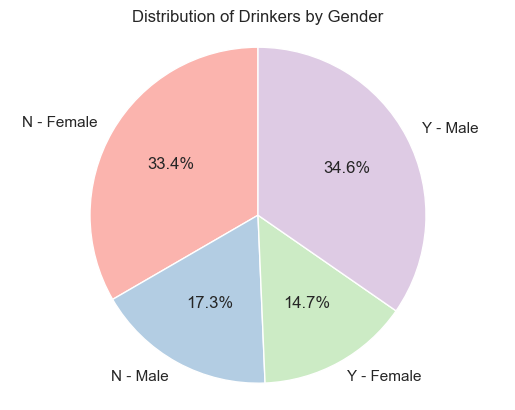

In [252]:
labels = gend_alcohol.apply(lambda row: f"{row['DRK_YN']} - {row['sex']}", axis=1)
sizes = gend_alcohol['count']
colors = plt.cm.Pastel1(range(len(labels)))

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax1.axis('equal') 

plt.title('Distribution of Drinkers by Gender')
plt.show()

### Observation: 
- Male drinkers are more compared to female drinkers.

# SMART Questions
## S - Specific
## M - Measurable
## A - Achievable
## R - Relevant
## T - Time Bound

## 1. Which age group is most habituated with drinking alchohol ?

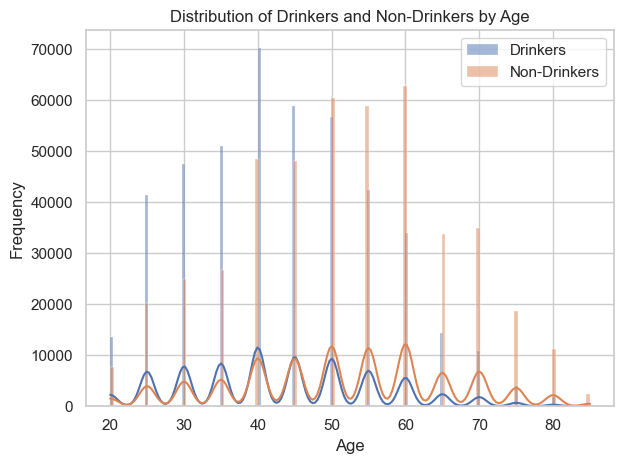

In [253]:
drinker = df_cleaned[df_cleaned['DRK_YN'] == 'Y']
non_drinker = df_cleaned[df_cleaned['DRK_YN'] == 'N']

sns.histplot(drinker, x='age', label='Drinkers', kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')

sns.histplot(non_drinker, x='age', label='Non-Drinkers', kde=True)
plt.title('Distribution of Drinkers and Non-Drinkers by Age')

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()



### Observation: 
The data suggests that alcohol consumption is more pronounced among individuals in the younger to middle age brackets compared to their older counterparts. This intriguing age-related trend prompts further investigation into whether social factors or generational influences play a role in shaping drinking behaviors.

## 2. Does every individual who drinks follow smoking trend ? 

Text(0.5, 1.0, 'Distribution of Smoking Individuals by Alcohol Consumption')

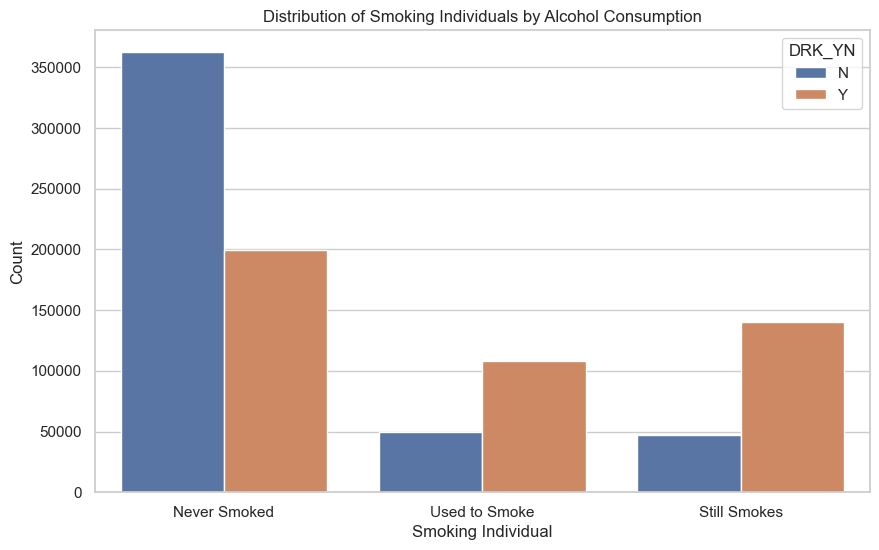

In [254]:
smoking_trend = df_cleaned.groupby(['SMK_stat_type_cd', 'DRK_YN']).size().reset_index(name='count')
smoking_trend['SMK_stat_type_cd'] = smoking_trend['SMK_stat_type_cd'].replace({1: 'Never Smoked', 2: 'Used to Smoke', 3: 'Still Smokes'})

plt.figure(figsize=(10,6))
sns.barplot(data=smoking_trend, x='SMK_stat_type_cd', y='count', hue='DRK_YN')
plt.xlabel('Smoking Individual')
plt.ylabel('Count')
plt.title('Distribution of Smoking Individuals by Alcohol Consumption')

### Observation: 
1. Let's look at some interesting findings about smoking and drinking habits:
First, we see that people who have never smoked are twice as likely to drink alcohol compared to those who neither smoke nor drink.
2. Next, if we consider individuals who used to smoke, those who currently drink are twice as common as those who have quit both smoking and drinking.
3. Lastly, among those who are still smoking, the ones who also drink are twice as many as those who don't drink."
These patterns suggest a strong connection between smoking behaviors and alcohol consumption.


# 3. Is there any significant impact of alcohol on eye sight/ Is there any correlation of alcohol with blindness ? 

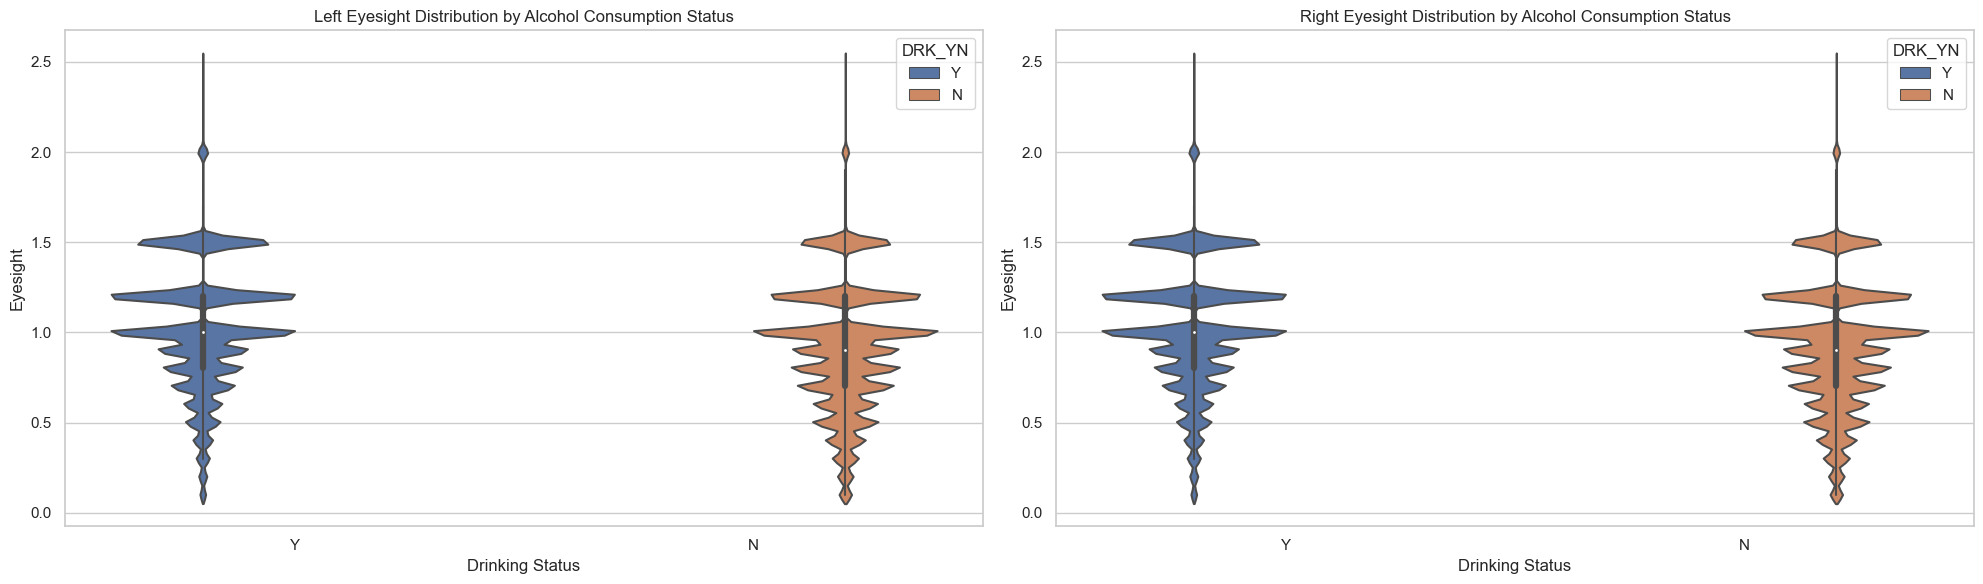

In [292]:
plt.figure(figsize=(20, 6)) 


plt.subplot(1, 2, 1) 
sns.violinplot(x='DRK_YN', y='sight_left', data=df_cleaned, hue="DRK_YN")
plt.title('Left Eyesight Distribution by Alcohol Consumption Status')
plt.xlabel('Drinking Status')
plt.ylabel('Eyesight')


plt.subplot(1, 2, 2) 
sns.violinplot(x='DRK_YN', y='sight_left', data=df_cleaned, hue = 'DRK_YN')
plt.title('Right Eyesight Distribution by Alcohol Consumption Status')
plt.xlabel('Drinking Status')
plt.ylabel('Eyesight')


plt.tight_layout()  
plt.show()

### Observation: 
By visual observation, It is very hard to determine if there is any significant difference added to eye sight due to alcohol consumption. So, it would be a better step to implement statistical measures to determine the significance. However, before condcuting the statistical test, we need know the distribution to choose between T-Test or Mann-Whitney U Test.

# Checking Data Normality using Shapiro Test.

In [256]:
from scipy.stats import shapiro

data = df_cleaned['sight_left']  
stat, p = shapiro(data)
print('Left Eye Sight:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data looks normal (fail to reject H0)')
else:
    print('Data does not look normal (reject H0)')
    
data = df_cleaned['sight_right']  
stat, p = shapiro(data)
print('\n\nRight Eye Sight:')
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Data looks normal (fail to reject H0)')
else:
    print('Data does not look normal (reject H0)')

Left Eye Sight:
Statistics=0.967, p=0.000
Data does not look normal (reject H0)


Right Eye Sight:
Statistics=0.976, p=0.000
Data does not look normal (reject H0)


/Users/vishal/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Observation: 
Since the data is not normal, we will continue with Mann-Whitney U Test.

# Mann-Whitney U Test

In [257]:
from scipy.stats import mannwhitneyu

group_left_No = df_cleaned[df_cleaned['DRK_YN'] == 'N']['sight_left']
group_left_Yes = df_cleaned[df_cleaned['DRK_YN'] == 'Y']['sight_left']

group_right_No = df_cleaned[df_cleaned['DRK_YN'] == 'N']['sight_right']
group_right_Yes = df_cleaned[df_cleaned['DRK_YN'] == 'Y']['sight_right']

u_stat_l, p_value_l = mannwhitneyu(group_left_No, group_left_Yes)
print('Left Eye Sight:')
print('U-statistic:', u_stat_l)
print('P-value:', p_value_l)


u_stat_r, p_value_r = mannwhitneyu(group_right_No, group_right_Yes)
print('\n\nRight Eye Sight:')
print('U-statistic:', u_stat_r)
print('P-value:', p_value_r)


Left Eye Sight:
U-statistic: 83126118542.0
P-value: 0.0


Right Eye Sight:
U-statistic: 83310640173.5
P-value: 0.0


### Observation: 
**Statistical Significance**:
1. The p-values for both tests are 0.0, which is commonly interpreted as less than the typical alpha level of 0.05. This indicates that you can reject the null hypothesis, which states that there is no difference in the distribution of eyesight between drinkers and non-drinkers.
2. Since the p-values are significantly low, there is strong evidence to suggest that the distributions of eyesight scores for drinkers and non-drinkers are different for both the left and right eyes.

# 4. Does drinking alcohol regularly effect liver, Alcohol significance on liver over time ? 

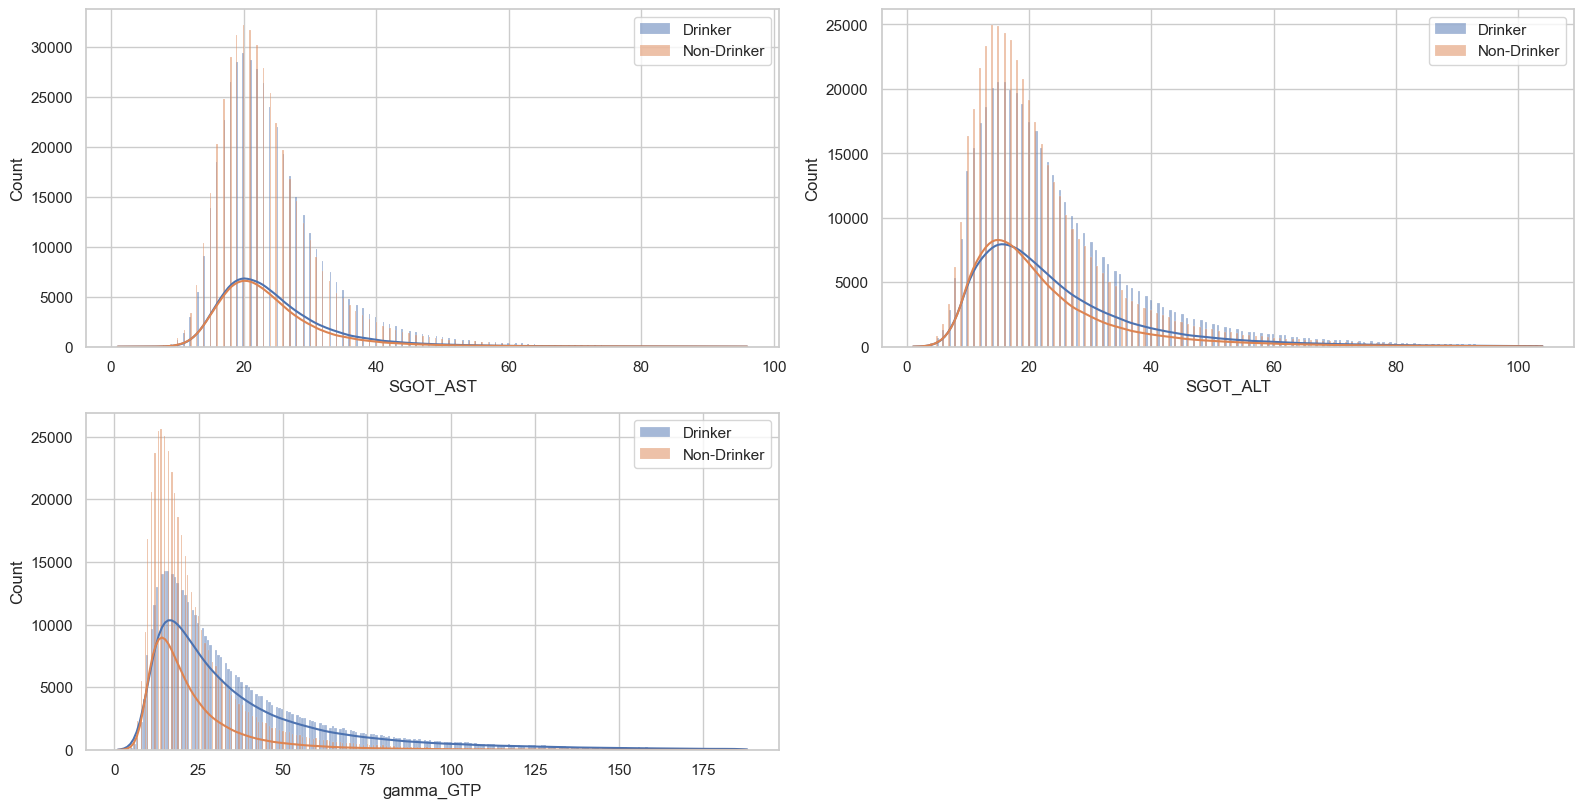

In [258]:
Liver_test = ['SGOT_AST', 'SGOT_ALT', 'gamma_GTP']

num_rows = 9
num_cols = 2

num_plots = min(len(Liver_test), num_rows * num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 36))

axes = axes.flatten()

sns.set(style="whitegrid")

for i in range(num_plots):
    column = Liver_test[i]

    drinkers = df_cleaned[df_cleaned["DRK_YN"] == "Y"]
    non_drinkers = df_cleaned[df_cleaned["DRK_YN"] == "N"]

    sns.histplot(drinkers[column], ax=axes[i], label="Drinker", kde=True)
    sns.histplot(non_drinkers[column], ax=axes[i], label="Non-Drinker", kde=True)

    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")
    axes[i].legend()

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Observation: 
- gamma_GTP display elevated values among participants who consume alcohol. These findings raise questions about the impact of alcohol on liver function and warrant additional investigations into the potential hepatotoxic effects of alcohol consumption.

# Model Building

## Encoding: 

In [259]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
df_cleaned['DRK_YN_encoded'] = label_encoder.fit_transform(df_cleaned['DRK_YN'])

df_model = pd.get_dummies(df_cleaned, columns=['sex'], prefix=['sex'], dtype=int)

df_model = df_model.drop(['DRK_YN'], axis=1)

print("\nDataFrame after Encoding:")
print(df_model.head())



DataFrame after Encoding:
   age  height  weight  waistline  sight_left  sight_right  hear_left  \
0   35     170      75       90.0         1.0          1.0        1.0   
1   30     180      80       89.0         0.9          1.2        1.0   
2   40     165      75       91.0         1.2          1.5        1.0   
3   50     175      80       91.0         1.5          1.2        1.0   
4   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP   DBP  ...  urine_protein  serum_creatinine  SGOT_AST  \
0         1.0  120.0  80.0  ...            1.0               1.0      21.0   
1         1.0  130.0  82.0  ...            1.0               0.9      20.0   
2         1.0  120.0  70.0  ...            1.0               0.9      47.0   
3         1.0  145.0  87.0  ...            1.0               1.1      29.0   
4         1.0  138.0  82.0  ...            1.0               0.8      19.0   

   SGOT_ALT  gamma_GTP  SMK_stat_type_cd  blindness  DRK_YN_encod

/var/folders/by/j9csnfcn3c30bpt40jz1c2qw0000gn/T/ipykernel_1510/3222771411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['DRK_YN_encoded'] = label_encoder.fit_transform(df_cleaned['DRK_YN'])


# Feature Importance by Random Forest

Feature: age, Score: 0.06994
Feature: height, Score: 0.04475
Feature: weight, Score: 0.02990
Feature: waistline, Score: 0.05009
Feature: sight_left, Score: 0.02980
Feature: sight_right, Score: 0.02952
Feature: hear_left, Score: 0.00188
Feature: hear_right, Score: 0.00180
Feature: SBP, Score: 0.04677
Feature: DBP, Score: 0.04398
Feature: BLDS, Score: 0.05071
Feature: tot_chole, Score: 0.05222
Feature: HDL_chole, Score: 0.06165
Feature: LDL_chole, Score: 0.05300
Feature: triglyceride, Score: 0.05738
Feature: hemoglobin, Score: 0.05545
Feature: urine_protein, Score: 0.00483
Feature: serum_creatinine, Score: 0.03010
Feature: SGOT_AST, Score: 0.04378
Feature: SGOT_ALT, Score: 0.05026
Feature: gamma_GTP, Score: 0.07221
Feature: SMK_stat_type_cd, Score: 0.04817
Feature: blindness, Score: 0.00000
Feature: sex_Female, Score: 0.04056
Feature: sex_Male, Score: 0.03123


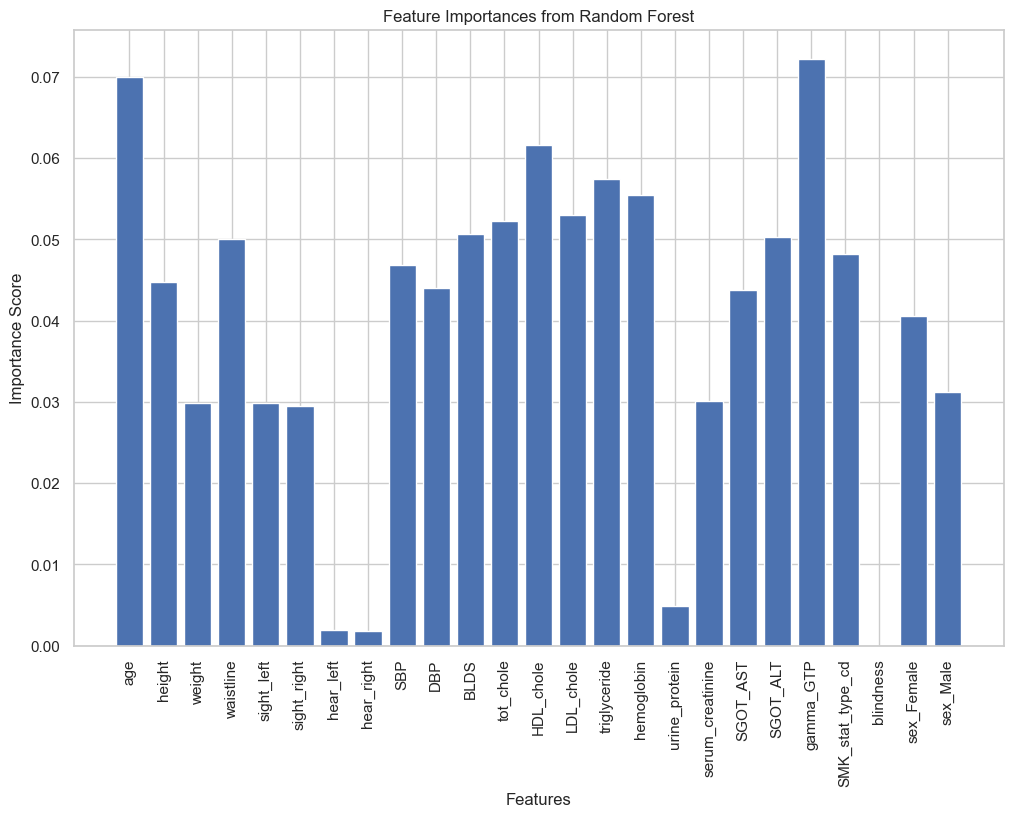

In [260]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X = df_model.drop('DRK_YN_encoded', axis=1)
y = df_model['DRK_YN_encoded']
model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
feature_names = X.columns  

for i in range(len(importances)):
    print('Feature: %s, Score: %.5f' % (feature_names[i], importances[i]))

plt.figure(figsize=(12, 8)) 
plt.bar(feature_names, importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances from Random Forest')
plt.show()

# Feature Importance by Recursive Feature Elimination

In [261]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter= 100)

rfe = RFE(estimator=model, n_features_to_select=15)  # Adjust the number of features as needed
rfe.fit(X, y)
feature_names = X.columns

print("RFE Feature Selection:")
for i in range(len(rfe.support_)):
    print('Feature: %s, Selected: %s, Rank: %d' % (feature_names[i], rfe.support_[i], rfe.ranking_[i]))

/Users/vishal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vishal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

RFE Feature Selection:
Feature: age, Selected: True, Rank: 1
Feature: height, Selected: True, Rank: 1
Feature: weight, Selected: True, Rank: 1
Feature: waistline, Selected: False, Rank: 2
Feature: sight_left, Selected: False, Rank: 4
Feature: sight_right, Selected: False, Rank: 7
Feature: hear_left, Selected: True, Rank: 1
Feature: hear_right, Selected: True, Rank: 1
Feature: SBP, Selected: True, Rank: 1
Feature: DBP, Selected: False, Rank: 6
Feature: BLDS, Selected: False, Rank: 10
Feature: tot_chole, Selected: False, Rank: 8
Feature: HDL_chole, Selected: True, Rank: 1
Feature: LDL_chole, Selected: False, Rank: 5
Feature: triglyceride, Selected: False, Rank: 9
Feature: hemoglobin, Selected: False, Rank: 3
Feature: urine_protein, Selected: True, Rank: 1
Feature: serum_creatinine, Selected: True, Rank: 1
Feature: SGOT_AST, Selected: True, Rank: 1
Feature: SGOT_ALT, Selected: True, Rank: 1
Feature: gamma_GTP, Selected: True, Rank: 1
Feature: SMK_stat_type_cd, Selected: True, Rank: 1
Feat

/Users/vishal/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [262]:
rfe_results = pd.DataFrame({'Feature': feature_names, 'Selected': rfe.support_, 'Rank': rfe.ranking_})
rfe_results_sorted = rfe_results.sort_values(by='Rank')
print(rfe_results_sorted)

             Feature  Selected  Rank
0                age      True     1
21  SMK_stat_type_cd      True     1
20         gamma_GTP      True     1
19          SGOT_ALT      True     1
18          SGOT_AST      True     1
17  serum_creatinine      True     1
16     urine_protein      True     1
23        sex_Female      True     1
12         HDL_chole      True     1
7         hear_right      True     1
6          hear_left      True     1
2             weight      True     1
1             height      True     1
8                SBP      True     1
24          sex_Male      True     1
3          waistline     False     2
15        hemoglobin     False     3
4         sight_left     False     4
13         LDL_chole     False     5
9                DBP     False     6
5        sight_right     False     7
11         tot_chole     False     8
14      triglyceride     False     9
10              BLDS     False    10
22         blindness     False    11


## Feature Split to Set 1 and Set 2
### Set 1: Mutual features from both feature importance method.
### Set 2: All the importance given by one of the feature importance method.

In [267]:
random_forest_list = ['age', 'height', 'weight', 'sight_left', 'sight_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 
    'HDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 
    'SMK_stat_type_cd', 'sex_Female', 'sex_Male']

RFE_List = ['age', 'SMK_stat_type_cd', 'gamma_GTP', 'SGOT_ALT', 'SGOT_AST', 
                'serum_creatinine', 'urine_protein', 'sex_Female', 'HDL_chole', 
                'hear_right', 'hear_left', 'weight', 'height', 'SBP', 'sex_Male']

In [268]:
set1 = list(set(random_forest_list) & set(RFE_List))
set2 = random_forest_list
print("Common Features of Set 1 and Set 2:\n",set1)
print("\n\nFeatures of Set 2:\n", set2)

Common Features of Set 1 and Set 2:
 ['gamma_GTP', 'HDL_chole', 'age', 'SMK_stat_type_cd', 'serum_creatinine', 'sex_Female', 'SGOT_ALT', 'SBP', 'weight', 'sex_Male', 'height', 'SGOT_AST']


Features of Set 2:
 ['age', 'height', 'weight', 'sight_left', 'sight_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd', 'sex_Female', 'sex_Male']


In [270]:
df_model_ = df_model.copy()

In [271]:
target = 'DRK_YN_encoded'
set1_data = df_model_[set1 + [target]]
set2_data = df_model_[set2 + [target]]

# Random Forest Classifier

In [272]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X1_train, X1_test, y1_train, y1_test = train_test_split(
    set1_data.drop(target, axis=1), set1_data[target], test_size=0.2, random_state=42)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    set2_data.drop(target, axis=1), set2_data[target], test_size=0.2, random_state=42)

model1 = RandomForestClassifier(random_state=42)
model2 = RandomForestClassifier(random_state=42)

model1.fit(X1_train, y1_train)
model2.fit(X2_train, y2_train)

y1_pred = model1.predict(X1_test)
y2_pred = model2.predict(X2_test)

metrics1 = {
    'Accuracy': accuracy_score(y1_test, y1_pred),
    'Precision': precision_score(y1_test, y1_pred),
    'Recall': recall_score(y1_test, y1_pred),
    'F1 Score': f1_score(y1_test, y1_pred),
    'ROC AUC Score': roc_auc_score(y1_test, y1_pred)
}

metrics2 = {
    'Accuracy': accuracy_score(y2_test, y2_pred),
    'Precision': precision_score(y2_test, y2_pred),
    'Recall': recall_score(y2_test, y2_pred),
    'F1 Score': f1_score(y2_test, y2_pred),
    'ROC AUC Score': roc_auc_score(y2_test, y2_pred)
}

metrics1, metrics2

({'Accuracy': 0.7253220540874399,
  'Precision': 0.7210363626145113,
  'Recall': 0.7196369673988647,
  'F1 Score': 0.7203359853567879,
  'ROC AUC Score': 0.7252277116653318},
 {'Accuracy': 0.7288900163232893,
  'Precision': 0.7242617359303474,
  'Recall': 0.724180484193049,
  'F1 Score': 0.7242211077827516,
  'ROC AUC Score': 0.7288118629559791})

# Confusion Matrix and AUC-ROC Curve

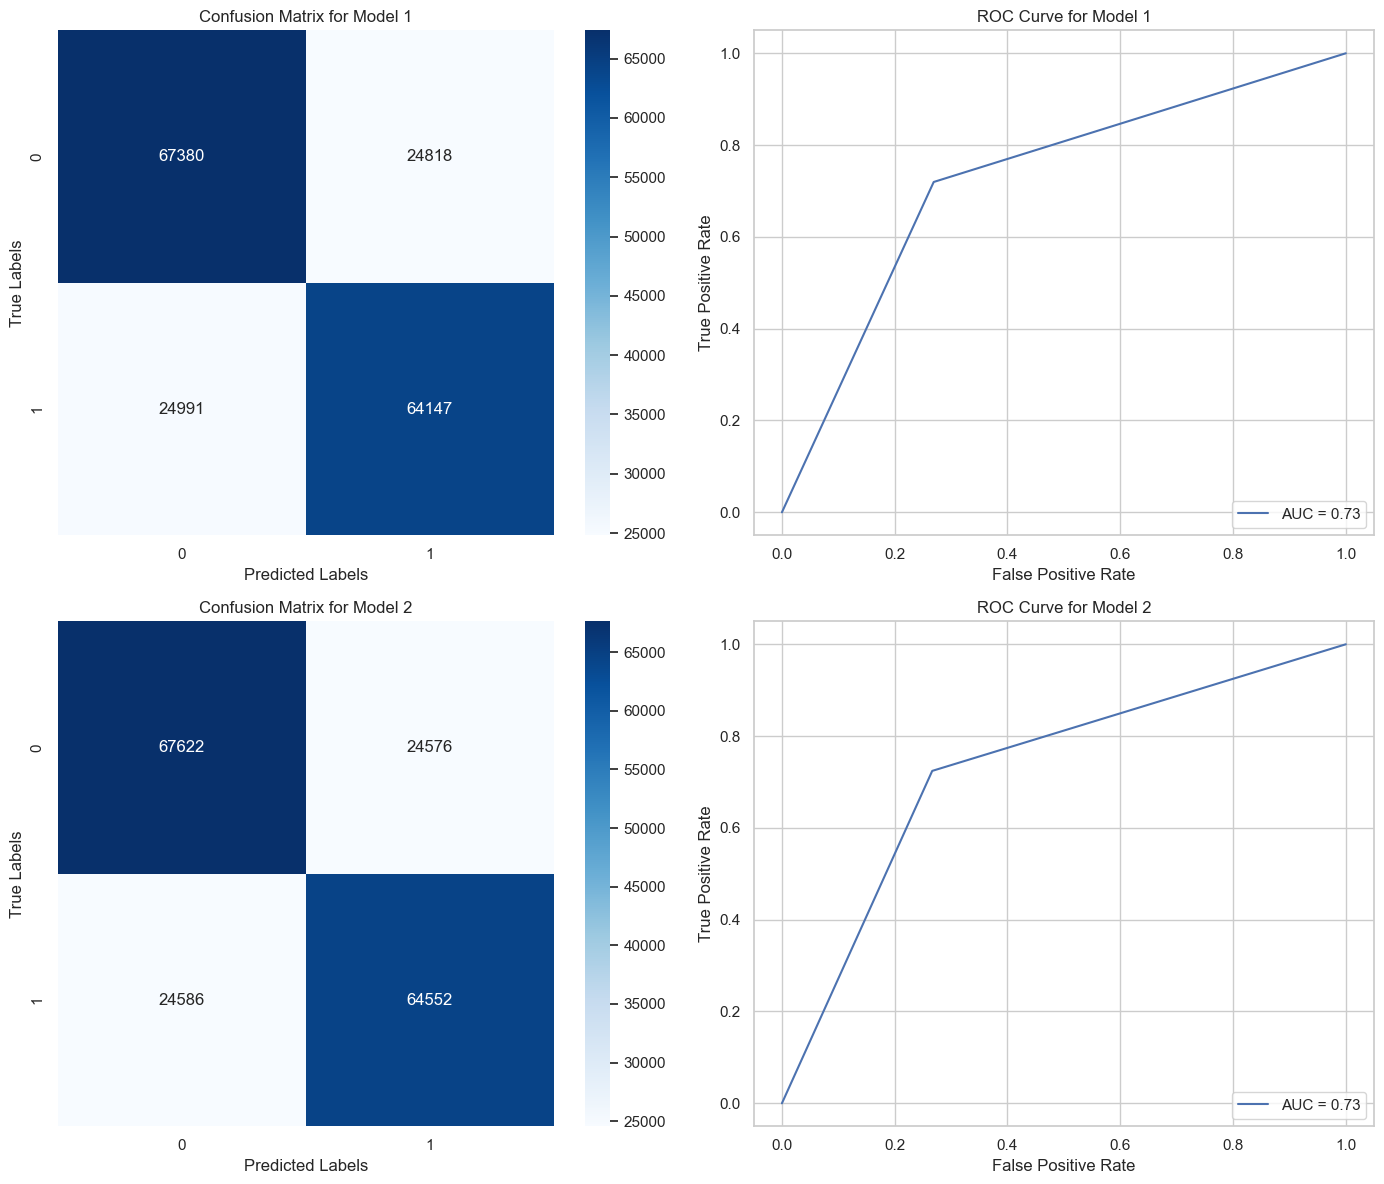

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay

conf_matrix1 = confusion_matrix(y1_test, y1_pred)
fpr1, tpr1, thresholds1 = roc_curve(y1_test, y1_pred)
roc_auc1 = auc(fpr1, tpr1)

conf_matrix2 = confusion_matrix(y2_test, y2_pred)
fpr2, tpr2, thresholds2 = roc_curve(y2_test, y2_pred)
roc_auc2 = auc(fpr2, tpr2)

fig, ax = plt.subplots(2, 2, figsize=(14, 12))

sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="Blues", ax=ax[0, 0])
ax[0, 0].set_title('Confusion Matrix for Model 1')
ax[0, 0].set_xlabel('Predicted Labels')
ax[0, 0].set_ylabel('True Labels')

RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=roc_auc1).plot(ax=ax[0, 1])
ax[0, 1].set_title('ROC Curve for Model 1')
ax[0, 1].set_xlabel('False Positive Rate')
ax[0, 1].set_ylabel('True Positive Rate')

sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues", ax=ax[1, 0])
ax[1, 0].set_title('Confusion Matrix for Model 2')
ax[1, 0].set_xlabel('Predicted Labels')
ax[1, 0].set_ylabel('True Labels')

RocCurveDisplay(fpr=fpr2, tpr=tpr2, roc_auc=roc_auc2).plot(ax=ax[1, 1])
ax[1, 1].set_title('ROC Curve for Model 2')
ax[1, 1].set_xlabel('False Positive Rate')
ax[1, 1].set_ylabel('True Positive Rate')

plt.tight_layout()
plt.show()

# Gradient Boosting

In [274]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model1 = GradientBoostingClassifier(random_state=42)
gb_model1.fit(X1_train, y1_train)
y1_gb_pred = gb_model1.predict(X1_test)

gb_model2 = GradientBoostingClassifier(random_state=42)
gb_model2.fit(X2_train, y2_train)
y2_gb_pred = gb_model2.predict(X2_test)

gb_metrics1 = {
    'Accuracy': accuracy_score(y1_test, y1_gb_pred),
    'Precision': precision_score(y1_test, y1_gb_pred),
    'Recall': recall_score(y1_test, y1_gb_pred),
    'F1 Score': f1_score(y1_test, y1_gb_pred),
    'ROC AUC Score': roc_auc_score(y1_test, y1_gb_pred)
}

gb_metrics2 = {
    'Accuracy': accuracy_score(y2_test, y2_gb_pred),
    'Precision': precision_score(y2_test, y2_gb_pred),
    'Recall': recall_score(y2_test, y2_gb_pred),
    'F1 Score': f1_score(y2_test, y2_gb_pred),
    'ROC AUC Score': roc_auc_score(y2_test, y2_gb_pred)
}

gb_metrics1, gb_metrics2

({'Accuracy': 0.7298385317862972,
  'Precision': 0.7186138700121972,
  'Recall': 0.7402678992124571,
  'F1 Score': 0.7292801803693594,
  'ROC AUC Score': 0.7300116042191269},
 {'Accuracy': 0.7301252922751136,
  'Precision': 0.7185875546468886,
  'Recall': 0.7412887881711504,
  'F1 Score': 0.729761668102401,
  'ROC AUC Score': 0.7303105473643883})

# Confusion Matrix, AUC-ROC Curve

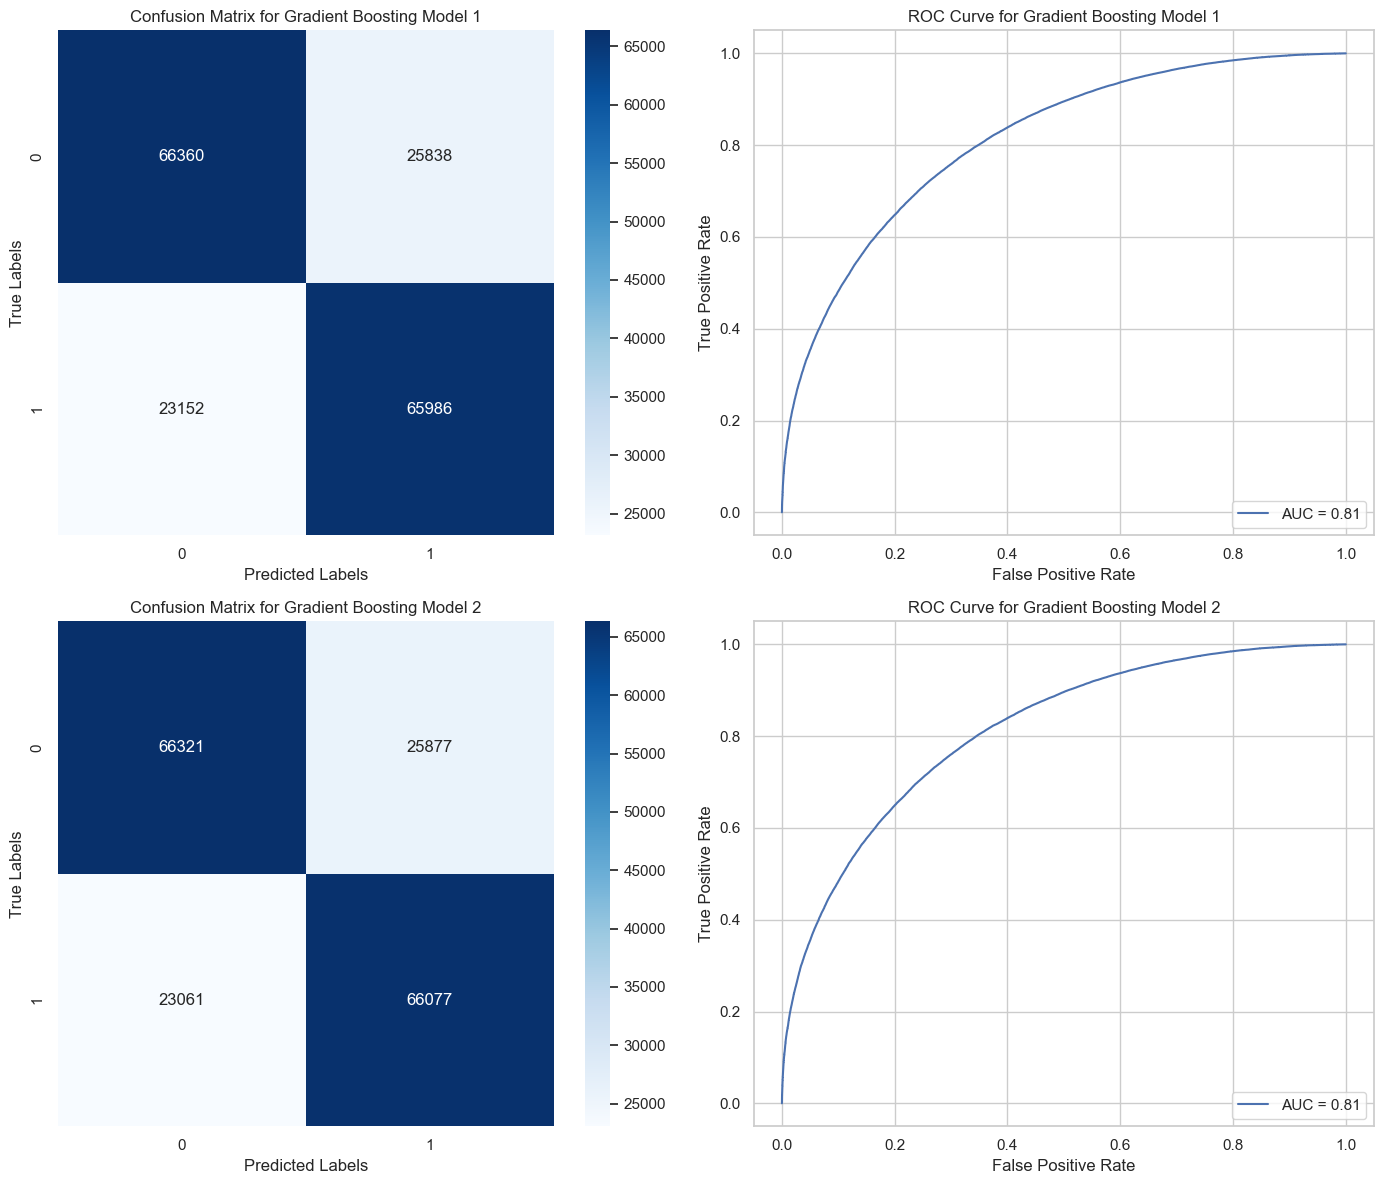

In [276]:
y1_gb_pred_proba = gb_model1.predict_proba(X1_test)[:, 1]
y2_gb_pred_proba = gb_model2.predict_proba(X2_test)[:, 1]

conf_matrix_gb1 = confusion_matrix(y1_test, y1_gb_pred)
fpr_gb1, tpr_gb1, thresholds_gb1 = roc_curve(y1_test, y1_gb_pred_proba)
roc_auc_gb1 = auc(fpr_gb1, tpr_gb1)

conf_matrix_gb2 = confusion_matrix(y2_test, y2_gb_pred)
fpr_gb2, tpr_gb2, thresholds_gb2 = roc_curve(y2_test, y2_gb_pred_proba)
roc_auc_gb2 = auc(fpr_gb2, tpr_gb2)

fig, ax = plt.subplots(2, 2, figsize=(14, 12))

sns.heatmap(conf_matrix_gb1, annot=True, fmt="d", cmap="Blues", ax=ax[0, 0])
ax[0, 0].set_title('Confusion Matrix for Gradient Boosting Model 1')
ax[0, 0].set_xlabel('Predicted Labels')
ax[0, 0].set_ylabel('True Labels')

RocCurveDisplay(fpr=fpr_gb1, tpr=tpr_gb1, roc_auc=roc_auc_gb1).plot(ax=ax[0, 1])
ax[0, 1].set_title('ROC Curve for Gradient Boosting Model 1')
ax[0, 1].set_xlabel('False Positive Rate')
ax[0, 1].set_ylabel('True Positive Rate')

sns.heatmap(conf_matrix_gb2, annot=True, fmt="d", cmap="Blues", ax=ax[1, 0])
ax[1, 0].set_title('Confusion Matrix for Gradient Boosting Model 2')
ax[1, 0].set_xlabel('Predicted Labels')
ax[1, 0].set_ylabel('True Labels')

RocCurveDisplay(fpr=fpr_gb2, tpr=tpr_gb2, roc_auc=roc_auc_gb2).plot(ax=ax[1, 1])
ax[1, 1].set_title('ROC Curve for Gradient Boosting Model 2')
ax[1, 1].set_xlabel('False Positive Rate')
ax[1, 1].set_ylabel('True Positive Rate')

plt.tight_layout()
plt.show()

# XG Boost 

In [279]:
from xgboost import XGBClassifier

xgb_model1 = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model1.fit(X1_train, y1_train)
y1_xgb_pred = xgb_model1.predict(X1_test)

xgb_model2 = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model2.fit(X2_train, y2_train)
y2_xgb_pred = xgb_model2.predict(X2_test)

xgb_metrics1 = {
    'Accuracy': accuracy_score(y1_test, y1_xgb_pred),
    'Precision': precision_score(y1_test, y1_xgb_pred),
    'Recall': recall_score(y1_test, y1_xgb_pred),
    'F1 Score': f1_score(y1_test, y1_xgb_pred),
    'ROC AUC Score': roc_auc_score(y1_test, y1_xgb_pred)
}

xgb_metrics2 = {
    'Accuracy': accuracy_score(y2_test, y2_xgb_pred),
    'Precision': precision_score(y2_test, y2_xgb_pred),
    'Recall': recall_score(y2_test, y2_xgb_pred),
    'F1 Score': f1_score(y2_test, y2_xgb_pred),
    'ROC AUC Score': roc_auc_score(y2_test, y2_xgb_pred)
}

xgb_metrics1, xgb_metrics2

({'Accuracy': 0.732915692416288,
  'Precision': 0.7269969440788739,
  'Recall': 0.7312706141039736,
  'F1 Score': 0.7291275167785234,
  'ROC AUC Score': 0.7328883928022201},
 {'Accuracy': 0.7344322142321437,
  'Precision': 0.7284973515472539,
  'Recall': 0.7328860867419058,
  'F1 Score': 0.730685129157276,
  'ROC AUC Score': 0.7344065566792677})

# Confusion Matrix, AUC-ROC Score

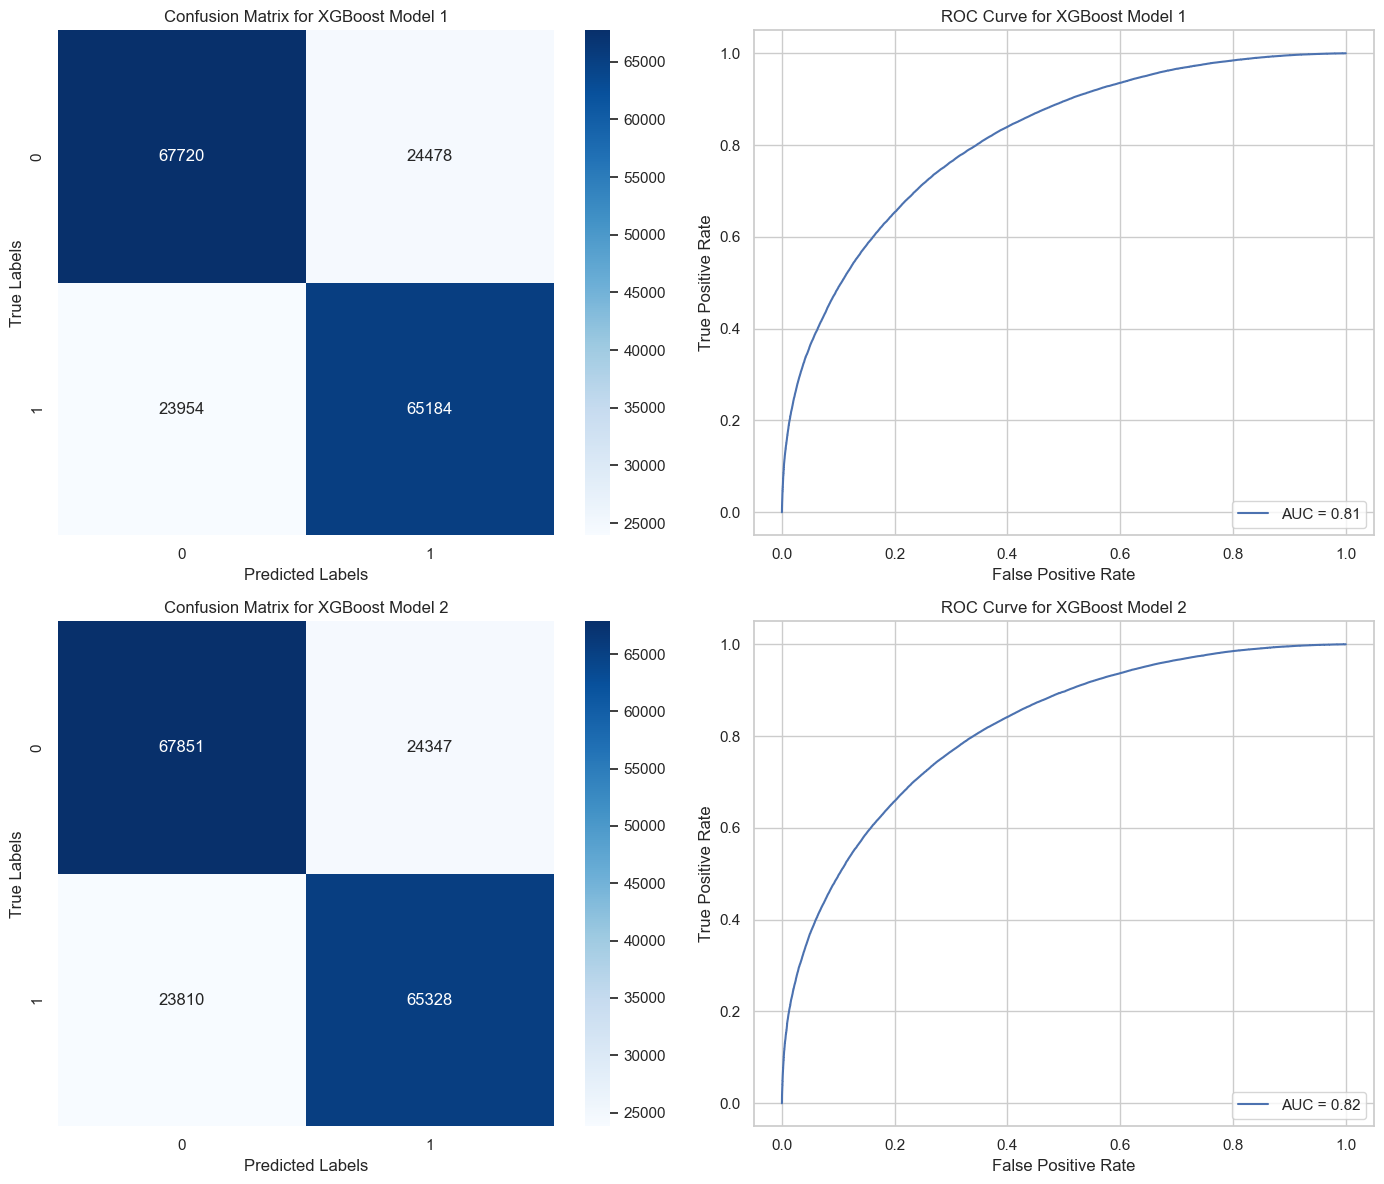

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay

y1_xgb_pred_proba = xgb_model1.predict_proba(X1_test)[:, 1]
y2_xgb_pred_proba = xgb_model2.predict_proba(X2_test)[:, 1]

conf_matrix_xgb1 = confusion_matrix(y1_test, y1_xgb_pred)
fpr_xgb1, tpr_xgb1, thresholds_xgb1 = roc_curve(y1_test, y1_xgb_pred_proba)
roc_auc_xgb1 = auc(fpr_xgb1, tpr_xgb1)

conf_matrix_xgb2 = confusion_matrix(y2_test, y2_xgb_pred)
fpr_xgb2, tpr_xgb2, thresholds_xgb2 = roc_curve(y2_test, y2_xgb_pred_proba)
roc_auc_xgb2 = auc(fpr_xgb2, tpr_xgb2)

fig, ax = plt.subplots(2, 2, figsize=(14, 12))

sns.heatmap(conf_matrix_xgb1, annot=True, fmt="d", cmap="Blues", ax=ax[0, 0])
ax[0, 0].set_title('Confusion Matrix for XGBoost Model 1')
ax[0, 0].set_xlabel('Predicted Labels')
ax[0, 0].set_ylabel('True Labels')

RocCurveDisplay(fpr=fpr_xgb1, tpr=tpr_xgb1, roc_auc=roc_auc_xgb1).plot(ax=ax[0, 1])
ax[0, 1].set_title('ROC Curve for XGBoost Model 1')
ax[0, 1].set_xlabel('False Positive Rate')
ax[0, 1].set_ylabel('True Positive Rate')

sns.heatmap(conf_matrix_xgb2, annot=True, fmt="d", cmap="Blues", ax=ax[1, 0])
ax[1, 0].set_title('Confusion Matrix for XGBoost Model 2')
ax[1, 0].set_xlabel('Predicted Labels')
ax[1, 0].set_ylabel('True Labels')

RocCurveDisplay(fpr=fpr_xgb2, tpr=tpr_xgb2, roc_auc=roc_auc_xgb2).plot(ax=ax[1, 1])
ax[1, 1].set_title('ROC Curve for XGBoost Model 2')
ax[1, 1].set_xlabel('False Positive Rate')
ax[1, 1].set_ylabel('True Positive Rate')

plt.tight_layout()
plt.show()

# K-Fold Cross Validation

In [286]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

optimized_xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', **optimal_params)

cv_scores = cross_val_score(optimized_xgb_model, X2_train, y2_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())
print("Standard Deviation of CV scores:", cv_scores.std())

Cross-validation scores: [0.73368351 0.73388342 0.73480023 0.73507596 0.73631676]
Mean CV score: 0.7347519783825516
Standard Deviation of CV scores: 0.0009435944073793006


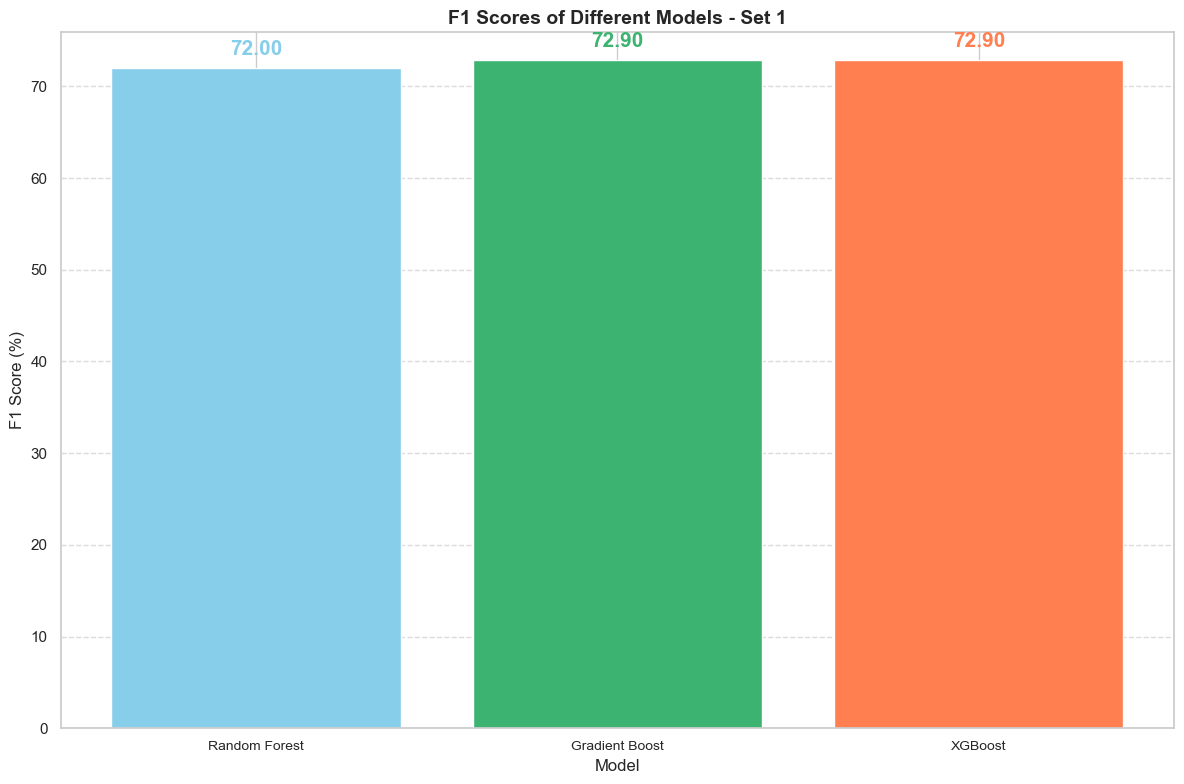

In [297]:
Recall_percentage_set1 = {
    'Random Forest': 72,
    'Gradient Boost':72.9 ,
    'XGBoost': 72.9
   
}

colors = ['skyblue', 'mediumseagreen', 'coral', 'slateblue']
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)

heights = list(Recall_percentage_set1.values())
indices = range(len(Recall_percentage_set1))

bars = plt.bar(indices, heights, color=colors)
for bar, color in zip(bars, colors):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, '{:.2f}'.format(yval), ha='center', va='bottom', color=color, fontweight='bold', fontsize=15)

plt.xlabel('Model', fontsize=12)
plt.ylabel('F1 Score (%)', fontsize=12)
plt.title('F1 Scores of Different Models - Set 1', fontsize=14, fontweight='bold')

plt.xticks(indices, list(Recall_percentage_set1.keys()), fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(heights) + 3)

plt.tight_layout()
plt.show()

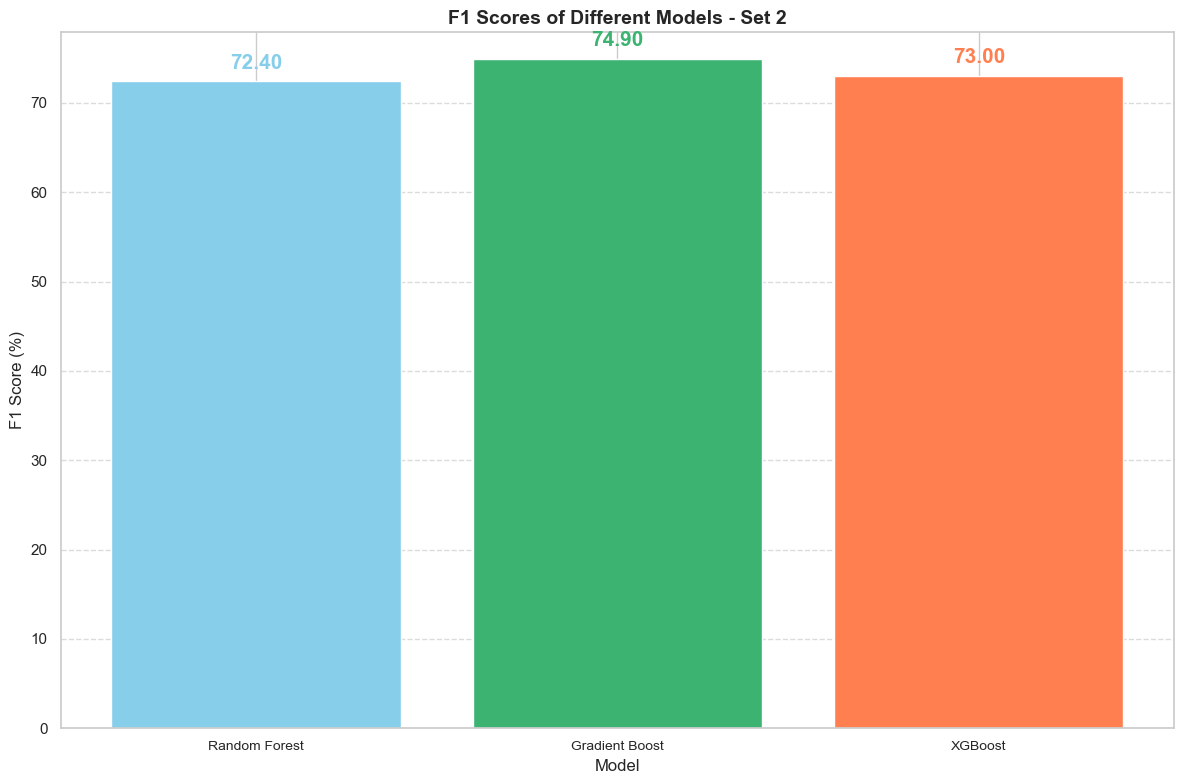

In [298]:
Recall_percentage_set1 = {
    'Random Forest': 72.4,
    'Gradient Boost':74.9 ,
    'XGBoost': 73
   
}

colors = ['skyblue', 'mediumseagreen', 'coral', 'slateblue']
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)

heights = list(Recall_percentage_set1.values())
indices = range(len(Recall_percentage_set1))

bars = plt.bar(indices, heights, color=colors)
for bar, color in zip(bars, colors):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, '{:.2f}'.format(yval), ha='center', va='bottom', color=color, fontweight='bold', fontsize=15)

plt.xlabel('Model', fontsize=12)
plt.ylabel('F1 Score (%)', fontsize=12)
plt.title('F1 Scores of Different Models - Set 2', fontsize=14, fontweight='bold')

plt.xticks(indices, list(Recall_percentage_set1.keys()), fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(heights) + 3)

plt.tight_layout()
plt.show()